First, we imported all necessary libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
%matplotlib inline

In [2]:
#check out king county housing regulations

Next, we read in the housing data

In [3]:
kcdf = pd.read_csv("../../../data/kc_house_data.csv")
kcdf

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
#Because the column names data file is not a csv, I did not know how to read it in
#Instead, I am using .info() to get a list of column names

We used .info() to get a list of column names that we can easily reference

In [5]:
kcdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
#drop columns you don't need

We learned how many null values are present and which columns they are in

In [7]:
kcdf.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

We found out what the correlation is between each of the feature variables and price, then sorted the correlations from lowest to highest value

In [8]:
corr = kcdf.corr()
corr["price"].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.129599
floors           0.256804
waterfront       0.276295
lat              0.306692
bedrooms         0.308787
view             0.395734
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

In [9]:
#taking it up until year renovated
#use df.loc 
#loc is the same as indexing

We decided to drop the columns that do not have a notable correlation with price. Below, we redefine the dataframe as only including the columns we want to keep.

In [10]:
new_df = kcdf[['id', 'price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'bedrooms', 'waterfront', 'floors']]
new_df

,id,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,bedrooms,waterfront,floors
0,7129300520,221900.0,1180,7,1180,1340,1.00,0.0,3,NaN,1.0
1,6414100192,538000.0,2570,7,2170,1690,2.25,0.0,3,0.0,2.0
2,5631500400,180000.0,770,6,770,2720,1.00,0.0,2,0.0,1.0
3,2487200875,604000.0,1960,7,1050,1360,3.00,0.0,4,0.0,1.0
4,1954400510,510000.0,1680,8,1680,1800,2.00,0.0,3,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,1530,8,1530,1530,2.50,0.0,3,0.0,3.0
21593,6600060120,400000.0,2310,8,2310,1830,2.50,0.0,4,0.0,2.0
21594,1523300141,402101.0,1020,7,1020,1020,0.75,0.0,2,0.0,2.0
21595,291310100,400000.0,1600,8,1600,1410,2.50,0.0,3,NaN,2.0


In [11]:
#to see the highest value in the grade column

We used .sort_values, setting the ascending paramater to False, to find the highest value in the grade column

In [12]:
new_df["grade"].sort_values(ascending = False)

4407     13
7028     13
10362    13
13398    13
9245     13
         ..
8610      4
5199      4
8588      4
1065      4
3220      3
Name: grade, Length: 21597, dtype: int64

We examined price

In [13]:
#lookin at price
kcdf['price'].sort_values(ascending = False)

7245     7700000.0
3910     7060000.0
9245     6890000.0
4407     5570000.0
1446     5350000.0
           ...    
2139       82500.0
8267       82000.0
16184      81000.0
465        80000.0
15279      78000.0
Name: price, Length: 21597, dtype: float64

In [14]:
#new_df.loc[[insert id here to see all of its information]]

In [15]:
#we're going predictive for our goal, youtube videos teach you how to do just like this

In [16]:
#think about getting rid of outliers
#we could have visualizations before and after outliers

We created Seaborn pairplots

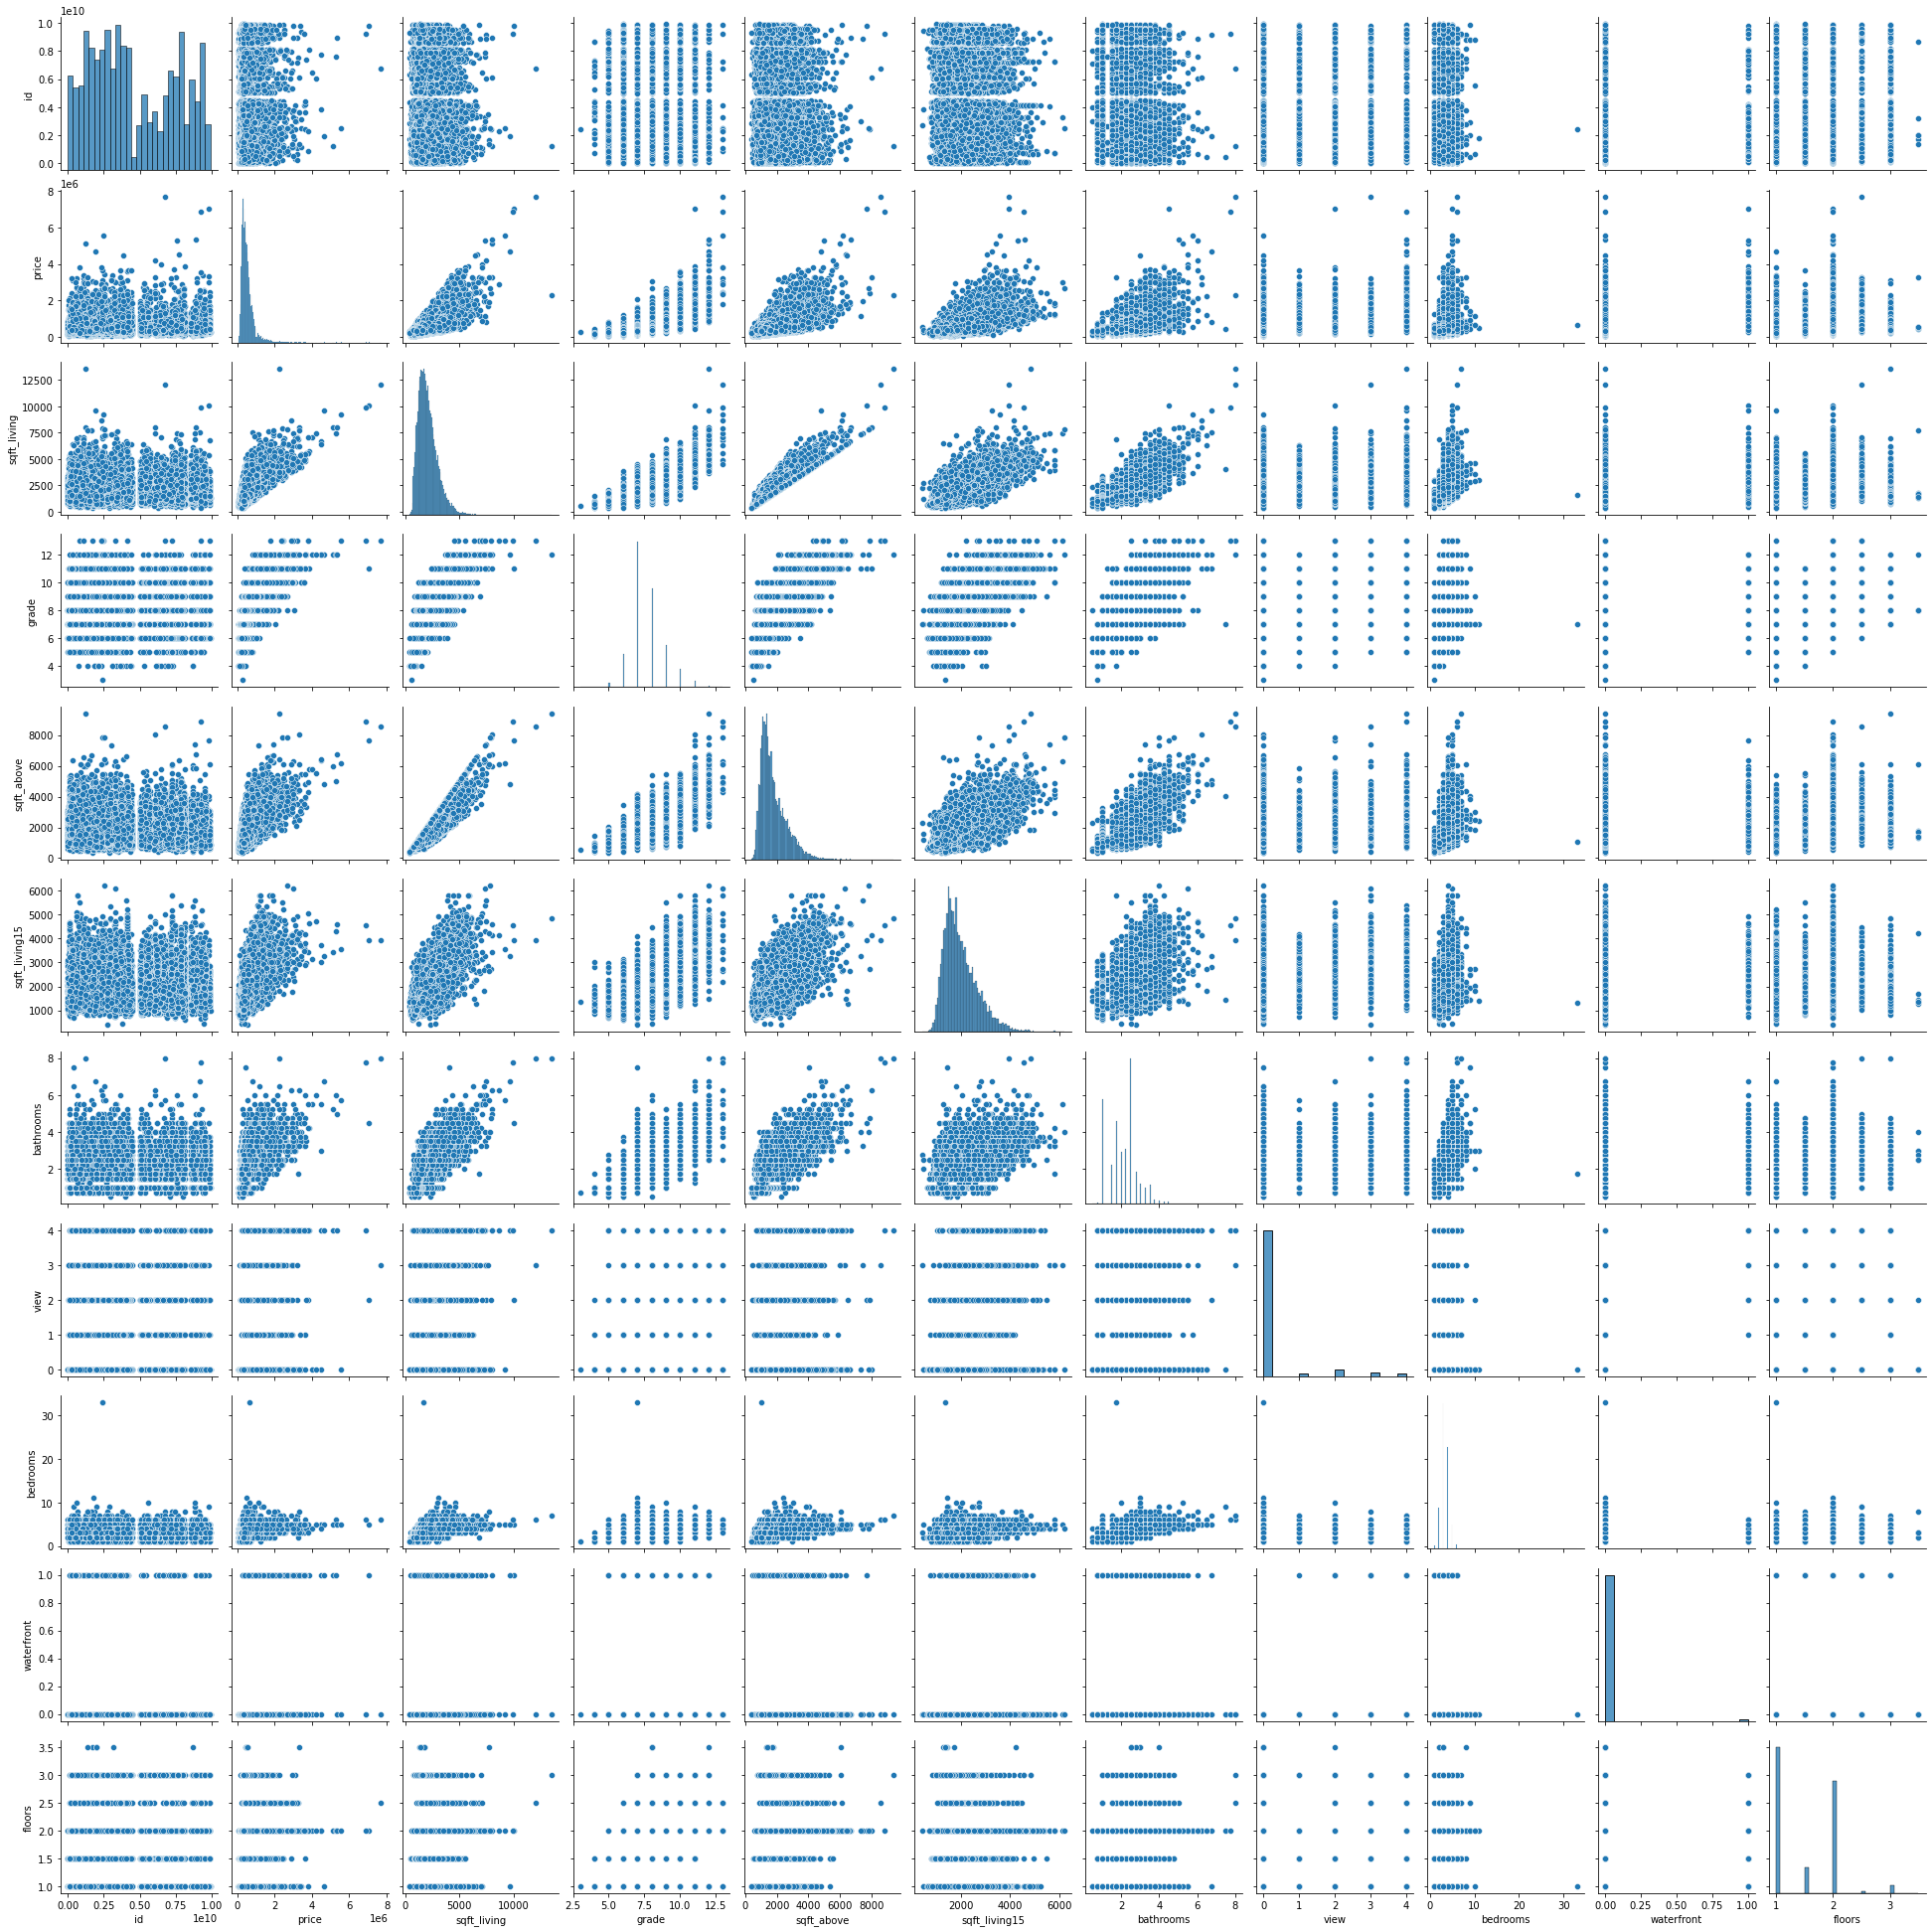

In [17]:
sns.pairplot(new_df);

We made sure all nulls were dropped from the dataframe

In [18]:
new_df = new_df.dropna()

In [19]:
new_df.isna().sum()

id               0
price            0
sqft_living      0
grade            0
sqft_above       0
sqft_living15    0
bathrooms        0
view             0
bedrooms         0
waterfront       0
floors           0
dtype: int64

In [20]:
#work on a heatmap
#with all the clean data, outliers gone

In [21]:
#could multiply bedrooms and bathrooms together to improve accuracy, r squared
#make a new feature: bedrooms and bathrooms
#group zipcodes - find the four zipcodes located in Bellview, make a Bellview column
#group zipcodes based on townships or municipalities or districts
#too high variance in zipcodes
#grouping lowers variance
#boolean value that says whether or not the home has a basement
#look into what view represents

We wanted to learn which values were present in the view column, to better understand what that column could represent

In [22]:
new_df.view.value_counts()

0.0    17312
2.0      836
3.0      435
1.0      291
4.0      290
Name: view, dtype: int64

In [23]:
#view is how cool of a view it is
#you could research to verify
#number one place to go - original source, person who made it

#grade is the most complicated variable, does not have a linear relationship w/grade, super rich homes have super high grades
#you can't bin grade
#difference between 10 and 11 is really big
#grade only helps predict higher priced homes

#we could make three predictive models

In [24]:
#check out squarefoot living, squarefoot above, squarefoot basement

In [25]:
#first I think we have to make a new column for basement

By subtracting squarefeet above ground from squarefeet of each house in general, we created a new column that would tell us the sqaure footage of the basement of each house.

In [26]:
new_df = new_df.assign(sqft_basement = new_df['sqft_living'] - new_df['sqft_above'])
new_df

,id,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,bedrooms,waterfront,floors,sqft_basement
1,6414100192,538000.0,2570,7,2170,1690,2.25,0.0,3,0.0,2.0,400
2,5631500400,180000.0,770,6,770,2720,1.00,0.0,2,0.0,1.0,0
3,2487200875,604000.0,1960,7,1050,1360,3.00,0.0,4,0.0,1.0,910
4,1954400510,510000.0,1680,8,1680,1800,2.00,0.0,3,0.0,1.0,0
5,7237550310,1230000.0,5420,11,3890,4760,4.50,0.0,4,0.0,1.0,1530
...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,1310,8,1180,1330,2.50,0.0,3,0.0,2.0,130
21592,263000018,360000.0,1530,8,1530,1530,2.50,0.0,3,0.0,3.0,0
21593,6600060120,400000.0,2310,8,2310,1830,2.50,0.0,4,0.0,2.0,0
21594,1523300141,402101.0,1020,7,1020,1020,0.75,0.0,2,0.0,2.0,0


However, we were interested in determining whether or not each house had a basement at all. To determine this, we turned each basement squarefootage into a boolean value and then created a column out of these values. True means a house has a basement and False means a house has no basement.

In [27]:
basement = []
for value in new_df["sqft_basement"]:
    if value == 0:
        basement.append("False")
    else:
        basement.append("True")

new_df["basement_bool"] = basement

new_df

,id,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,bedrooms,waterfront,floors,sqft_basement,basement_bool
1,6414100192,538000.0,2570,7,2170,1690,2.25,0.0,3,0.0,2.0,400,True
2,5631500400,180000.0,770,6,770,2720,1.00,0.0,2,0.0,1.0,0,False
3,2487200875,604000.0,1960,7,1050,1360,3.00,0.0,4,0.0,1.0,910,True
4,1954400510,510000.0,1680,8,1680,1800,2.00,0.0,3,0.0,1.0,0,False
5,7237550310,1230000.0,5420,11,3890,4760,4.50,0.0,4,0.0,1.0,1530,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,1310,8,1180,1330,2.50,0.0,3,0.0,2.0,130,True
21592,263000018,360000.0,1530,8,1530,1530,2.50,0.0,3,0.0,3.0,0,False
21593,6600060120,400000.0,2310,8,2310,1830,2.50,0.0,4,0.0,2.0,0,False
21594,1523300141,402101.0,1020,7,1020,1020,0.75,0.0,2,0.0,2.0,0,False


Because the relationship between a house having a basement or not and house price is easier to understand than the relationship between basement squarefootage and house price, we deleted the old column sqft_basement

In [28]:
del new_df['sqft_basement']

new_df

,id,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,bedrooms,waterfront,floors,basement_bool
1,6414100192,538000.0,2570,7,2170,1690,2.25,0.0,3,0.0,2.0,True
2,5631500400,180000.0,770,6,770,2720,1.00,0.0,2,0.0,1.0,False
3,2487200875,604000.0,1960,7,1050,1360,3.00,0.0,4,0.0,1.0,True
4,1954400510,510000.0,1680,8,1680,1800,2.00,0.0,3,0.0,1.0,False
5,7237550310,1230000.0,5420,11,3890,4760,4.50,0.0,4,0.0,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,1310,8,1180,1330,2.50,0.0,3,0.0,2.0,True
21592,263000018,360000.0,1530,8,1530,1530,2.50,0.0,3,0.0,3.0,False
21593,6600060120,400000.0,2310,8,2310,1830,2.50,0.0,4,0.0,2.0,False
21594,1523300141,402101.0,1020,7,1020,1020,0.75,0.0,2,0.0,2.0,False


Boolean values cannot be included in a heatmap, so we dropped the basement column for our heatmap

In [29]:
#Heatmap time!

In [30]:
no_bool_df = new_df.drop('basement_bool', axis='columns')
no_bool_df

,id,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,bedrooms,waterfront,floors
1,6414100192,538000.0,2570,7,2170,1690,2.25,0.0,3,0.0,2.0
2,5631500400,180000.0,770,6,770,2720,1.00,0.0,2,0.0,1.0
3,2487200875,604000.0,1960,7,1050,1360,3.00,0.0,4,0.0,1.0
4,1954400510,510000.0,1680,8,1680,1800,2.00,0.0,3,0.0,1.0
5,7237550310,1230000.0,5420,11,3890,4760,4.50,0.0,4,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,1310,8,1180,1330,2.50,0.0,3,0.0,2.0
21592,263000018,360000.0,1530,8,1530,1530,2.50,0.0,3,0.0,3.0
21593,6600060120,400000.0,2310,8,2310,1830,2.50,0.0,4,0.0,2.0
21594,1523300141,402101.0,1020,7,1020,1020,0.75,0.0,2,0.0,2.0


Then, we made the heatmap

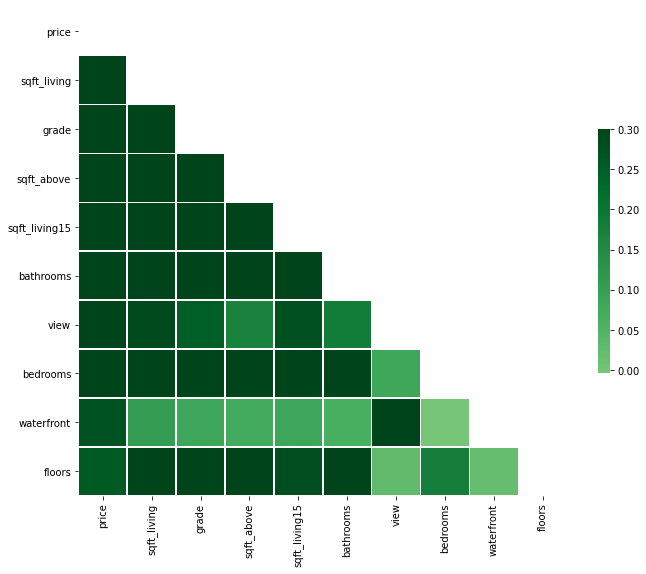

In [31]:
heatmap_df = no_bool_df.drop(columns='id')
heatmap_df.corr()
mask = np.triu(np.ones_like(heatmap_df.corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# colormap
cmap = "Greens"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(heatmap_df.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [32]:
#start making models, trying to figure out what works - we're all doing this

In [33]:
#if it predicts better on data it's never seen, it's undefit, the data it was traiend on doesn't fit

In [34]:
#You turn in your best model - we don't need to make an algorithm you can input stuff for - do it if you have extra time
#rn, present the steps you've taken to make your model as good as it is
#explain what you did to make your model more accurate

In [35]:
#model.predict and pass in parameters

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error as mse

In [37]:
kcdf = kcdf.dropna()
kcdf = kcdf.drop(labels=15856, axis=0)
kcdf["date"] = kcdf.date.apply(lambda x: x[-4:])
kcdf = kcdf.replace('?',np.nan)
kcdf = kcdf.dropna()
kcdf = kcdf.drop(labels=3220, axis=0)

In [38]:
reg = LinearRegression()
y = kcdf['price']
X = kcdf[["bedrooms", "bathrooms", "sqft_living", "floors", "waterfront", "view", "grade", "sqft_above", "sqft_living15"]]

In [39]:
# X = kcdf.drop(['id', 'price'], axis = 1)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [41]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(X_train[['view', 'grade']])
transformed_train = encoder.transform(X_train[['view', 'grade']])
transformed_train = pd.DataFrame(transformed_train, columns = encoder.get_feature_names(), index=X_train.index)
X_train_encoded = pd.concat([X_train.drop(['view', 'grade'], axis = 1), transformed_train], axis = 1)
test_condition = encoder.transform(X_test[['view', 'grade']])
test_condition = pd.DataFrame(test_condition, columns=encoder.get_feature_names(), index=X_test.index)
test_condition = pd.concat([X_test.drop(['view', 'grade'], axis = 1), test_condition], axis = 1)

In [42]:
reg.fit(X_train_encoded, y_train)

LinearRegression()

In [43]:
reg.score(X_train_encoded, y_train)

0.6326352716105776

In [44]:
reg.score(test_condition, y_test)

0.6355557598880417

In [45]:
train_preds = reg.predict(X_train_encoded)
test_preds = reg.predict(test_condition)

In [46]:
np.sqrt(mse(y_train, train_preds))

218115.03809626837

In [47]:
mse(y_test, test_preds, squared=False)

247361.0439989118

In [48]:
kcdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15427 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15427 non-null  int64  
 1   date           15427 non-null  object 
 2   price          15427 non-null  float64
 3   bedrooms       15427 non-null  int64  
 4   bathrooms      15427 non-null  float64
 5   sqft_living    15427 non-null  int64  
 6   sqft_lot       15427 non-null  int64  
 7   floors         15427 non-null  float64
 8   waterfront     15427 non-null  float64
 9   view           15427 non-null  float64
 10  condition      15427 non-null  int64  
 11  grade          15427 non-null  int64  
 12  sqft_above     15427 non-null  int64  
 13  sqft_basement  15427 non-null  object 
 14  yr_built       15427 non-null  int64  
 15  yr_renovated   15427 non-null  float64
 16  zipcode        15427 non-null  int64  
 17  lat            15427 non-null  float64
 18  long  

In [49]:
#separate target and features
reg = LinearRegression()
y2 = kcdf['price']
X2 = kcdf.drop(['id', 'price'], axis =1)

In [50]:
# 75-25 train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=.25, random_state=42)

In [51]:
# Instantiate StandardScaler 
scaler = StandardScaler()

In [52]:
# Scale training and testing data
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

In [53]:
# Fit model on the scaled training data
reg.fit(X_train_scaled2, y_train2)

LinearRegression()

In [54]:
# Make predictions for train and test sets
train_preds2 = reg.predict(X_train_scaled2)
test_preds2 = reg.predict(X_test_scaled2)

In [55]:
print('Training RMSE: {}'.format(np.sqrt(mse(y_train2, train_preds2))))
print('Testing RMSE: {}'.format(np.sqrt(mse(y_test2, test_preds2))))

Training RMSE: 195889.95277743947
Testing RMSE: 224697.79269061823


In [56]:
#try feature engineering columns, we have to reduce the error

In [57]:
#The baseline model is fine now, work on the second model

In [58]:
#drop outliers, top 1%, top 90%

In [59]:
z_scores = stats.zscore(kcdf)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
outliers_df = kcdf[filtered_entries]

print(outliers_df)

NameError: name 'stats' is not defined